# Binary Image Classifier | Disgust-Neutral

This aim of this project is to train deep learning models using the TensorFlow framework for the purpose of binary image classification for facial emotion recognition. The images used to train the models were retrieved from the __FER2013 dataset__ and the deep learning architecture used to build the models is __Convolutional Neural Network__. Seven different models were trained with a varying number of layers.
The emotions used on this image classifier are __disgust__ and __neutral__. 

In [1]:
import tensorflow as tf
import os

import cv2
import imghdr
import pandas
import pathlib

import numpy as np
import PIL
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [4]:
data_dir = "data/train"
os.listdir(data_dir)

['neutral', 'disgust']

In [5]:
#Data count

data_path = pathlib.Path(data_dir)

image_count = len(list(data_path.glob('*/*.jpg')))
disgust_image_count = len(list(data_path.glob('disgust/*.jpg')))
neutral_image_count = len(list(data_path.glob('neutral/*.jpg')))
print("disgust: ", disgust_image_count, "|", "Neutral: ", neutral_image_count)

disgust:  436 | Neutral:  436


In [9]:
print("Total number of training images: ", image_count)

Total number of training images:  872


In [6]:
img1 = cv2.imread('data/train/disgust/Training_11652168.jpg')
img2 = cv2.imread('data/train/neutral/Training_10031781.jpg')

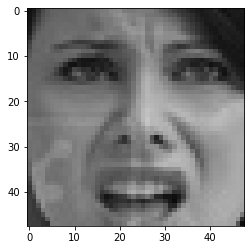

In [7]:
plt.imshow(img1);

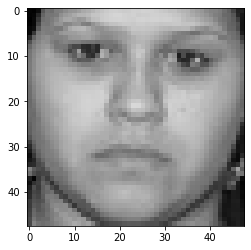

In [8]:
plt.imshow(img2);

### Load Data

In [10]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=16)

Found 872 files belonging to 2 classes.


2023-04-30 19:37:50.616423: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

In [13]:
batch[0].shape

(16, 256, 256, 3)

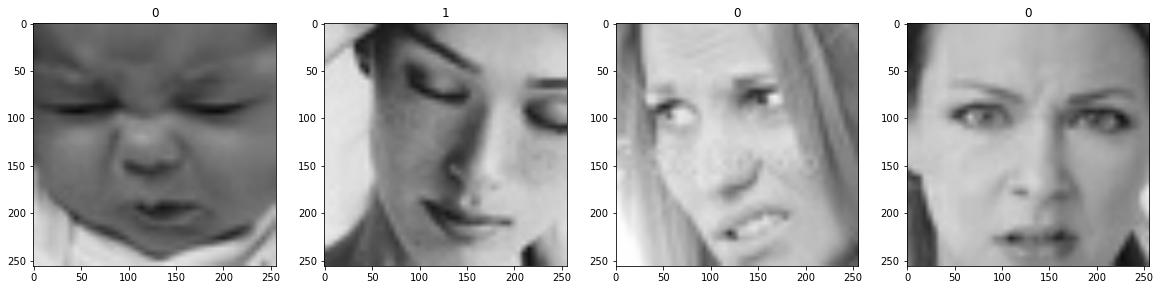

In [14]:
# visualizing the data
# class0 = disgust
# class1 = neutral
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Scaling the data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
batchh = data.as_numpy_iterator().next()

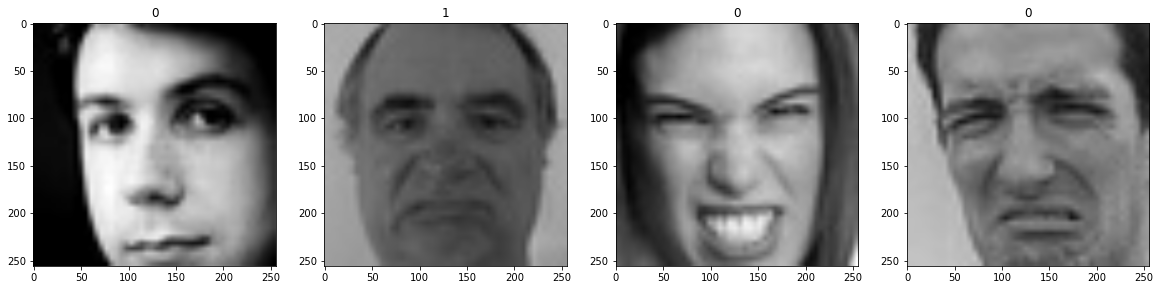

In [17]:
# visualizing the data
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batchh[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Spliting data for training and validation

In [18]:
# number of batches
len(data)

55

In [19]:
train_size = int(len(data)*.8) # 80% of data for training
val_size = int(len(data)*.2) # 20% of data for validation

In [20]:
train_size

44

In [21]:
val_size

11

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

### Building the deep learning model

#### 2 Layers

In [23]:
mod_2 = Sequential()

mod_2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_2.add(MaxPooling2D())

mod_2.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_2.add(MaxPooling2D())

mod_2.add(Flatten())

mod_2.add(Dense(256, activation='relu'))
mod_2.add(Dense(1, activation='sigmoid'))

In [24]:
mod_2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
mod_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 256)               3

#### 3 Layers

In [26]:
mod_3 = Sequential()

mod_3.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_3.add(MaxPooling2D())

mod_3.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_3.add(MaxPooling2D())

mod_3.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_3.add(MaxPooling2D())

mod_3.add(Flatten())

mod_3.add(Dense(256, activation='relu'))
mod_3.add(Dense(1, activation='sigmoid'))

In [27]:
mod_3.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
mod_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 16)      

#### 4 Layers

In [29]:
mod_4 = Sequential()

mod_4.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_4.add(MaxPooling2D())

mod_4.add(Flatten())

mod_4.add(Dense(256, activation='relu'))
mod_4.add(Dense(1, activation='sigmoid'))

In [30]:
mod_4.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
mod_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)      

##### 5 Layers

In [32]:
mod_5 = Sequential()

mod_5.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5.add(MaxPooling2D())

mod_5.add(Flatten())

mod_5.add(Dense(256, activation='relu'))
mod_5.add(Dense(1, activation='sigmoid'))

In [33]:
mod_5.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [34]:
mod_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 32)      

### Training the Models

In [35]:
logdir='logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
hist_2 = mod_2.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
44/44 [==============================] - 22s 453ms/step - loss: 1.3495 - accuracy: 0.5455 - val_loss: 0.6794 - val_accuracy: 0.5417
Epoch 2/20
44/44 [==============================] - 17s 390ms/step - loss: 0.6640 - accuracy: 0.5795 - val_loss: 0.6176 - val_accuracy: 0.6488
Epoch 3/20
44/44 [==============================] - 17s 384ms/step - loss: 0.6313 - accuracy: 0.6577 - val_loss: 0.6121 - val_accuracy: 0.6667
Epoch 4/20
44/44 [==============================] - 18s 400ms/step - loss: 0.5942 - accuracy: 0.7003 - val_loss: 0.5861 - val_accuracy: 0.6845
Epoch 5/20
44/44 [==============================] - 19s 428ms/step - loss: 0.5565 - accuracy: 0.7230 - val_loss: 0.5173 - val_accuracy: 0.7321
Epoch 6/20
44/44 [==============================] - 17s 380ms/step - loss: 0.4806 - accuracy: 0.7770 - val_loss: 0.4779 - val_accuracy: 0.7917
Epoch 7/20
44/44 [==============================] - 18s 412ms/step - loss: 0.3919 - accuracy: 0.8267 - val_loss: 0.4036 - val_accuracy: 0.8095

In [38]:
hist_3 = mod_3.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
44/44 [==============================] - 13s 286ms/step - loss: 0.6894 - accuracy: 0.5852 - val_loss: 0.6593 - val_accuracy: 0.6190
Epoch 2/20
44/44 [==============================] - 13s 293ms/step - loss: 0.6474 - accuracy: 0.6406 - val_loss: 0.6011 - val_accuracy: 0.6905
Epoch 3/20
44/44 [==============================] - 13s 284ms/step - loss: 0.5652 - accuracy: 0.7188 - val_loss: 0.5019 - val_accuracy: 0.7262
Epoch 4/20
44/44 [==============================] - 12s 271ms/step - loss: 0.4992 - accuracy: 0.7685 - val_loss: 0.4962 - val_accuracy: 0.7857
Epoch 5/20
44/44 [==============================] - 12s 264ms/step - loss: 0.3808 - accuracy: 0.8438 - val_loss: 0.4345 - val_accuracy: 0.8274
Epoch 6/20
44/44 [==============================] - 12s 263ms/step - loss: 0.2913 - accuracy: 0.8793 - val_loss: 0.4795 - val_accuracy: 0.8155
Epoch 7/20
44/44 [==============================] - 12s 263ms/step - loss: 0.1792 - accuracy: 0.9361 - val_loss: 0.4755 - val_accuracy: 0.8393

In [39]:
hist_4 = mod_4.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
44/44 [==============================] - 14s 311ms/step - loss: 0.6978 - accuracy: 0.4773 - val_loss: 0.6925 - val_accuracy: 0.5179
Epoch 2/20
44/44 [==============================] - 16s 364ms/step - loss: 0.6837 - accuracy: 0.5412 - val_loss: 0.6448 - val_accuracy: 0.6845
Epoch 3/20
44/44 [==============================] - 14s 319ms/step - loss: 0.6331 - accuracy: 0.6506 - val_loss: 0.5871 - val_accuracy: 0.6905
Epoch 4/20
44/44 [==============================] - 14s 319ms/step - loss: 0.5814 - accuracy: 0.6903 - val_loss: 0.5516 - val_accuracy: 0.7143
Epoch 5/20
44/44 [==============================] - 13s 306ms/step - loss: 0.4980 - accuracy: 0.7415 - val_loss: 0.4744 - val_accuracy: 0.7857
Epoch 6/20
44/44 [==============================] - 13s 302ms/step - loss: 0.4217 - accuracy: 0.8239 - val_loss: 0.4337 - val_accuracy: 0.8452
Epoch 7/20
44/44 [==============================] - 13s 304ms/step - loss: 0.3450 - accuracy: 0.8480 - val_loss: 0.4364 - val_accuracy: 0.8095

In [40]:
hist_5 = mod_5.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
44/44 [==============================] - 14s 302ms/step - loss: 0.6967 - accuracy: 0.4801 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/20
44/44 [==============================] - 13s 291ms/step - loss: 0.6932 - accuracy: 0.5043 - val_loss: 0.6897 - val_accuracy: 0.5357
Epoch 3/20
44/44 [==============================] - 12s 272ms/step - loss: 0.6850 - accuracy: 0.5398 - val_loss: 0.6524 - val_accuracy: 0.6488
Epoch 4/20
44/44 [==============================] - 12s 272ms/step - loss: 0.6764 - accuracy: 0.5795 - val_loss: 0.6619 - val_accuracy: 0.6071
Epoch 5/20
44/44 [==============================] - 12s 268ms/step - loss: 0.6653 - accuracy: 0.6080 - val_loss: 0.6238 - val_accuracy: 0.6429
Epoch 6/20
44/44 [==============================] - 12s 277ms/step - loss: 0.6310 - accuracy: 0.6534 - val_loss: 0.6011 - val_accuracy: 0.6964
Epoch 7/20
44/44 [==============================] - 12s 278ms/step - loss: 0.6195 - accuracy: 0.6605 - val_loss: 0.5677 - val_accuracy: 0.7321

### Checking Model Performance

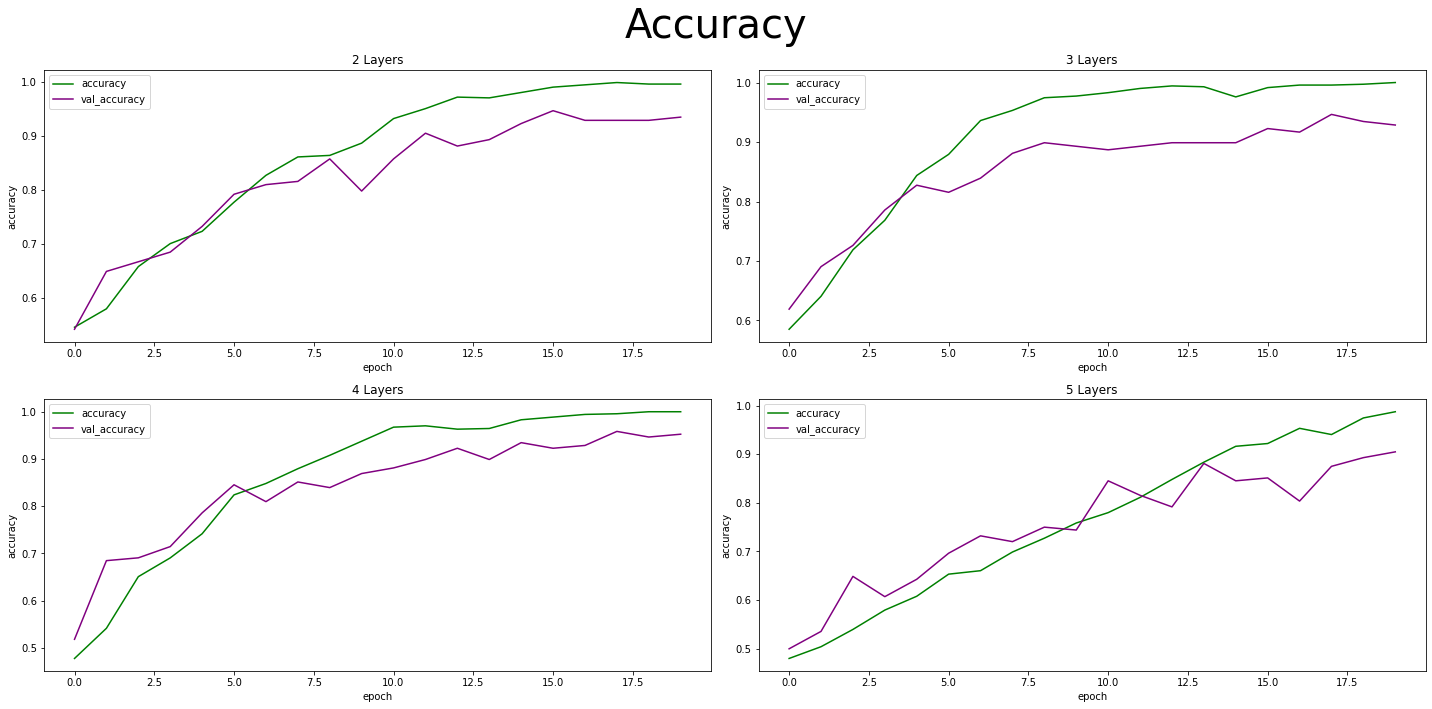

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Accuracy', fontsize=40)
axs[0, 0].plot(hist_2.history['accuracy'], color='green', label='accuracy')
axs[0, 0].plot(hist_2.history['val_accuracy'], color='purple', label='val_accuracy')
axs[0, 0].legend(loc="upper left")
axs[0, 0].set_title('2 Layers')
axs[0, 1].plot(hist_3.history['accuracy'], color='green', label='accuracy')
axs[0, 1].plot(hist_3.history['val_accuracy'], color='purple', label='val_accuracy')
axs[0, 1].legend(loc="upper left")
axs[0, 1].set_title('3 Layers')
axs[1, 0].plot(hist_4.history['accuracy'], color='green', label='accuracy')
axs[1, 0].plot(hist_4.history['val_accuracy'], color='purple', label='val_accuracy')
axs[1, 0].legend(loc="upper left")
axs[1, 0].set_title('4 Layers')
axs[1, 1].plot(hist_5.history['accuracy'], color='green', label='accuracy')
axs[1, 1].plot(hist_5.history['val_accuracy'], color='purple', label='val_accuracy')
axs[1, 1].legend(loc="upper left")
axs[1, 1].set_title('5 Layers')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')


fig.tight_layout()

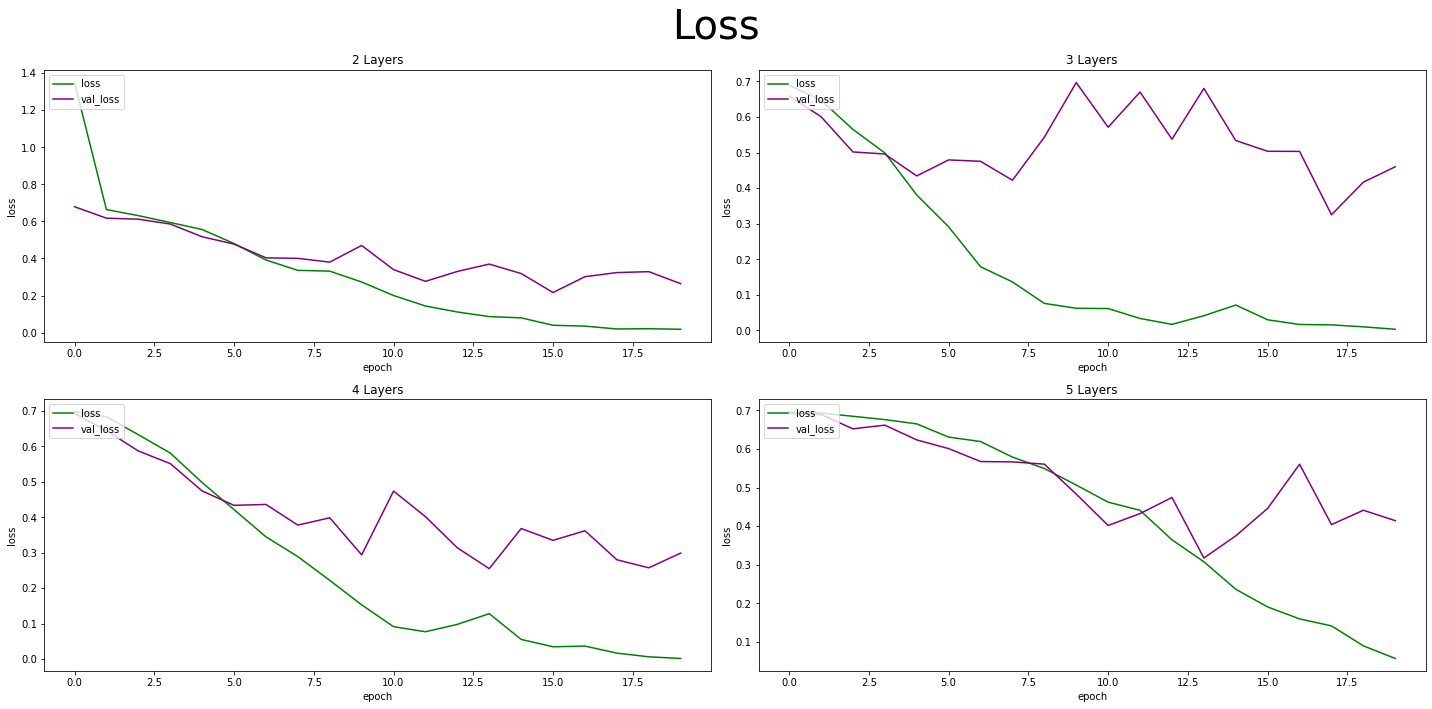

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Loss', fontsize=40)
axs[0, 0].plot(hist_2.history['loss'], color='green', label='loss')
axs[0, 0].plot(hist_2.history['val_loss'], color='purple', label='val_loss')
axs[0, 0].legend(loc="upper left")
axs[0, 0].set_title('2 Layers')
axs[0, 1].plot(hist_3.history['loss'], color='green', label='loss')
axs[0, 1].plot(hist_3.history['val_loss'], color='purple', label='val_loss')
axs[0, 1].legend(loc="upper left")
axs[0, 1].set_title('3 Layers')
axs[1, 0].plot(hist_4.history['loss'], color='green', label='loss')
axs[1, 0].plot(hist_4.history['val_loss'], color='purple', label='val_loss')
axs[1, 0].legend(loc="upper left")
axs[1, 0].set_title('4 Layers')
axs[1, 1].plot(hist_5.history['loss'], color='green', label='loss')
axs[1, 1].plot(hist_5.history['val_loss'], color='purple', label='val_loss')
axs[1, 1].legend(loc="upper left")
axs[1, 1].set_title('5 Layers')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')


fig.tight_layout()

### Creating another model using Softmax activation

In [43]:
mod_smx = Sequential()

mod_smx.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_smx.add(MaxPooling2D())

mod_smx.add(Flatten())

mod_smx.add(Dense(256, activation='relu'))
mod_smx.add(Dense(1, activation='softmax'))

In [44]:
mod_smx.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
mod_smx.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 32)      

### Another model using SVM

In [46]:
mod_svm = Sequential()

mod_svm.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_svm.add(MaxPooling2D())

mod_svm.add(Flatten())

mod_svm.add(Dense(256, activation='relu'))
mod_svm.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation ='linear'))

In [47]:
mod_svm.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [48]:
mod_svm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 32)      

#### Training the new models

In [49]:
hist_smx = mod_smx.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
44/44 [==============================] - 11s 231ms/step - loss: 0.6950 - accuracy: 0.5085 - val_loss: 0.6933 - val_accuracy: 0.4881
Epoch 2/25
44/44 [==============================] - 11s 255ms/step - loss: 0.6942 - accuracy: 0.5099 - val_loss: 0.6930 - val_accuracy: 0.4881
Epoch 3/25
44/44 [==============================] - 12s 271ms/step - loss: 0.6870 - accuracy: 0.5085 - val_loss: 0.6562 - val_accuracy: 0.5179
Epoch 4/25
44/44 [==============================] - 12s 263ms/step - loss: 0.6724 - accuracy: 0.5000 - val_loss: 0.6363 - val_accuracy: 0.5060
Epoch 5/25
44/44 [==============================] - 11s 254ms/step - loss: 0.6600 - accuracy: 0.5000 - val_loss: 0.6342 - val_accuracy: 0.4464
Epoch 6/25
44/44 [==============================] - 12s 263ms/step - loss: 0.6434 - accuracy: 0.5014 - val_loss: 0.6161 - val_accuracy: 0.5060
Epoch 7/25
44/44 [==============================] - 11s 244ms/step - loss: 0.6214 - accuracy: 0.5142 - val_loss: 0.6420 - val_accuracy: 0.4524

In [50]:
hist_svm = mod_svm.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
44/44 [==============================] - 13s 259ms/step - loss: 1.0274 - accuracy: 0.4915 - val_loss: 1.0082 - val_accuracy: 0.4881
Epoch 2/25
44/44 [==============================] - 12s 263ms/step - loss: 0.9907 - accuracy: 0.5213 - val_loss: 0.9866 - val_accuracy: 0.4821
Epoch 3/25
44/44 [==============================] - 11s 257ms/step - loss: 0.9503 - accuracy: 0.5284 - val_loss: 0.8640 - val_accuracy: 0.5595
Epoch 4/25
44/44 [==============================] - 12s 266ms/step - loss: 0.8772 - accuracy: 0.5852 - val_loss: 0.8809 - val_accuracy: 0.5476
Epoch 5/25
44/44 [==============================] - 12s 260ms/step - loss: 0.8213 - accuracy: 0.5852 - val_loss: 0.7801 - val_accuracy: 0.6071
Epoch 6/25
44/44 [==============================] - 11s 252ms/step - loss: 0.7973 - accuracy: 0.6051 - val_loss: 0.7798 - val_accuracy: 0.5833
Epoch 7/25
44/44 [==============================] - 11s 250ms/step - loss: 0.7483 - accuracy: 0.6435 - val_loss: 0.7378 - val_accuracy: 0.6667

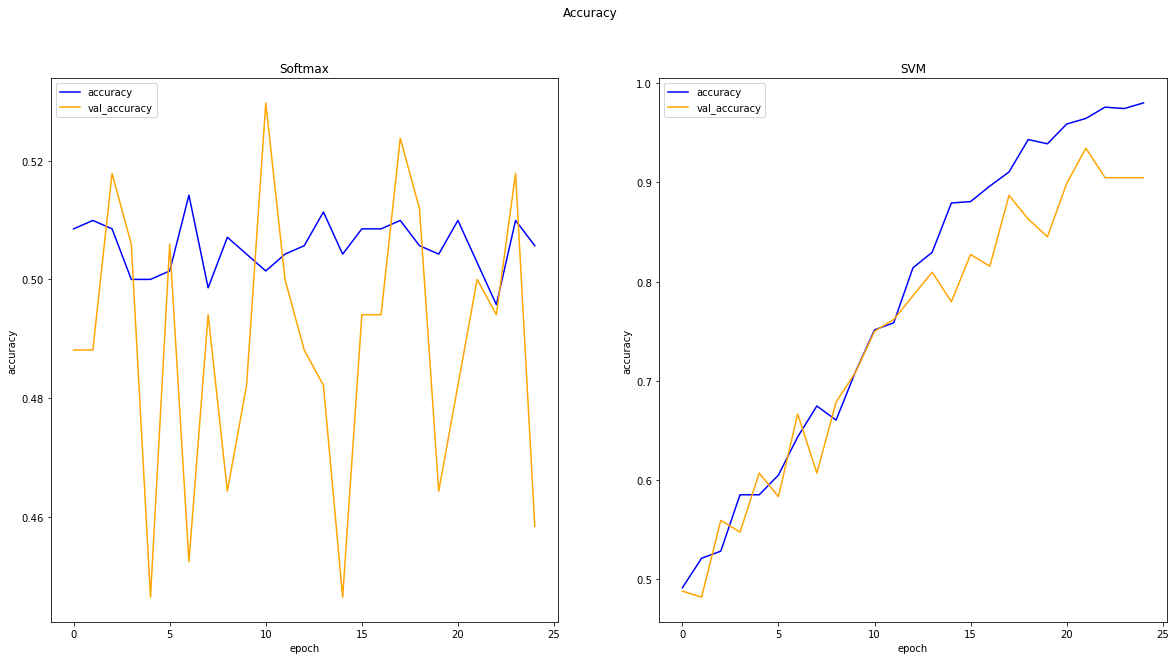

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Accuracy')
axs[0].plot(hist_smx.history['accuracy'], color='blue', label='accuracy')
axs[0].plot(hist_smx.history['val_accuracy'], color='orange', label='val_accuracy')
axs[0].legend(loc="upper left")
axs[0].set_title('Softmax')
axs[1].plot(hist_svm.history['accuracy'], color='blue', label='accuracy')
axs[1].plot(hist_svm.history['val_accuracy'], color='orange', label='val_accuracy')
axs[1].legend(loc="upper left")
axs[1].set_title('SVM')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')


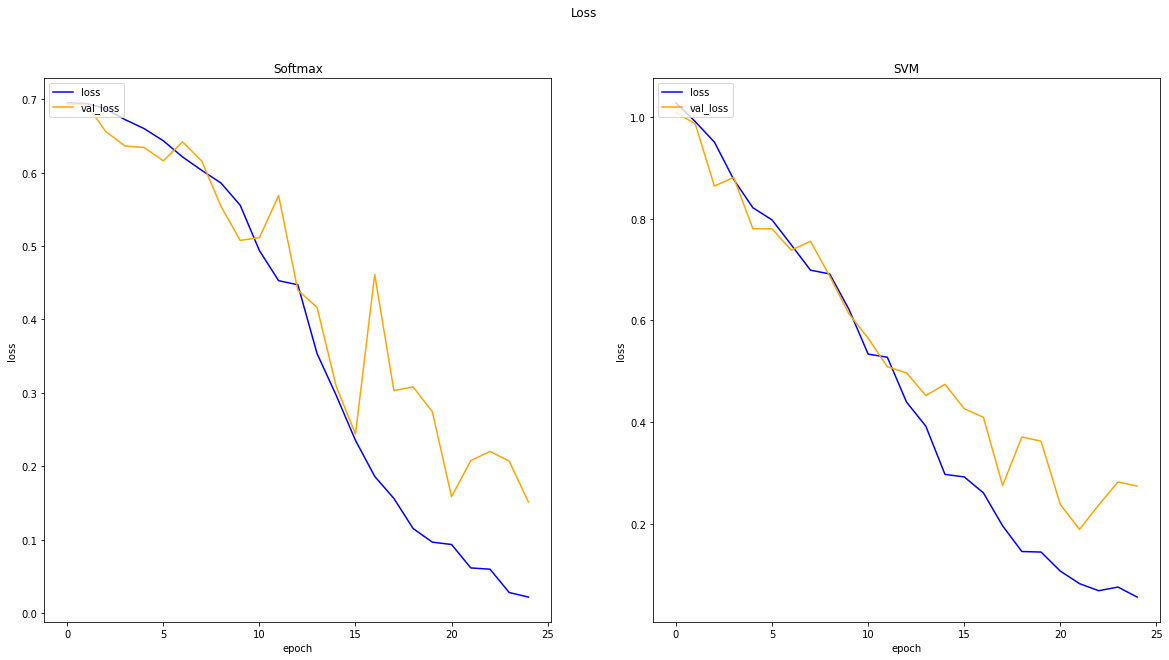

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Loss')
axs[0].plot(hist_smx.history['loss'], color='blue', label='loss')
axs[0].plot(hist_smx.history['val_loss'], color='orange', label='val_loss')
axs[0].legend(loc="upper left")
axs[0].set_title('Softmax')
axs[1].plot(hist_svm.history['loss'], color='blue', label='loss')
axs[1].plot(hist_svm.history['val_loss'], color='orange', label='val_loss')
axs[1].legend(loc="upper left")
axs[1].set_title('SVM')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')



### Adding a dropout layer

In [53]:
mod_5d = Sequential()

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(32, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Conv2D(16, (3,3), 1, activation='relu'))
mod_5d.add(MaxPooling2D())

mod_5d.add(Dropout(0.2))

mod_5d.add(Flatten())

mod_5d.add(Dense(256, activation='relu'))
mod_5d.add(Dense(1, activation='sigmoid'))

In [54]:
mod_5d.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [55]:
mod_5d.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 30, 30, 32)      

In [56]:
hist_5d = mod_5d.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
44/44 [==============================] - 14s 306ms/step - loss: 0.6982 - accuracy: 0.4986 - val_loss: 0.6950 - val_accuracy: 0.4702
Epoch 2/25
44/44 [==============================] - 13s 301ms/step - loss: 0.6924 - accuracy: 0.5312 - val_loss: 0.6878 - val_accuracy: 0.5238
Epoch 3/25
44/44 [==============================] - 12s 280ms/step - loss: 0.6868 - accuracy: 0.5483 - val_loss: 0.6697 - val_accuracy: 0.6488
Epoch 4/25
44/44 [==============================] - 12s 273ms/step - loss: 0.6793 - accuracy: 0.5838 - val_loss: 0.6632 - val_accuracy: 0.5952
Epoch 5/25
44/44 [==============================] - 12s 261ms/step - loss: 0.6633 - accuracy: 0.5881 - val_loss: 0.6551 - val_accuracy: 0.6071
Epoch 6/25
44/44 [==============================] - 12s 262ms/step - loss: 0.6428 - accuracy: 0.6222 - val_loss: 0.6308 - val_accuracy: 0.6548
Epoch 7/25
44/44 [==============================] - 11s 254ms/step - loss: 0.6241 - accuracy: 0.6321 - val_loss: 0.6215 - val_accuracy: 0.6310

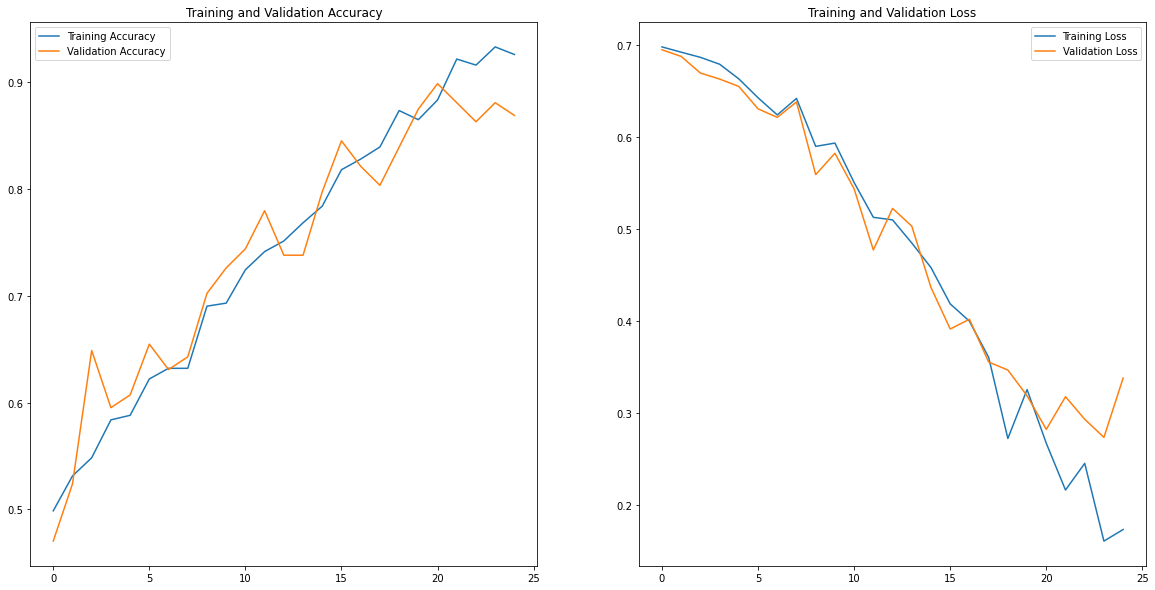

In [57]:
acc = hist_5d.history['accuracy']
val_acc = hist_5d.history['val_accuracy']

loss = hist_5d.history['loss']
val_loss = hist_5d.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Performance Evaluation

In [58]:
import pandas as pd

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [69]:
test_dir = 'data/test'
os.listdir(test_dir)

['neutral', 'disgust']

In [70]:
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size=110)

Found 220 files belonging to 2 classes.


In [71]:
test_iterator = test_ds.as_numpy_iterator()

In [72]:
test_batch = test_iterator.next()

In [73]:
len(test_ds)

2

In [74]:
test_batch[0].shape

(110, 256, 256, 3)

In [76]:
pre = Precision()
re = Recall()
biacc = BinaryAccuracy()

In [77]:
for test_batch in test_ds.as_numpy_iterator(): 
    X, y = test_batch
    yhat = mod_5d.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    biacc.update_state(y, yhat)

In [78]:
y

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
      dtype=int32)

In [79]:
yhat

array([[0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [3.9662852e-16],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [5.0406870e-11],
       [0.0000000e+00],
       [1.0000000e+00],
       [6.2965115e-16],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [3.0134950e-36],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.000000

In [80]:
yhat.shape

(110, 1)

In [81]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{biacc.result().numpy()}')

Precision: 0.8125, Recall:0.7090908885002136, Accuracy:0.7727272510528564


In [82]:
thresh = 0.5

yhat_binary = np.where(yhat > thresh, 1, 0)

In [83]:
yhat_binary

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [84]:
yy = np.asarray(yhat_binary).astype(dtype=np.int32)

In [85]:
yy = yy.reshape(110)
yy.shape

(110,)

In [86]:
y

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
      dtype=int32)

In [87]:
a = y
b = yy
df = pandas.DataFrame({"True": a, "Pred": b})
print(df)

     True  Pred
0       0     0
1       1     1
2       0     0
3       1     1
4       0     0
..    ...   ...
105     1     1
106     1     1
107     1     0
108     0     0
109     1     1

[110 rows x 2 columns]


### Confusion Matrix

In [88]:
cm = confusion_matrix(y, yhat_binary)

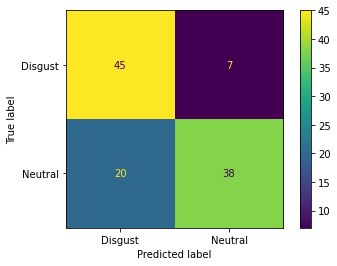

In [90]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Disgust', 'Neutral'])

cm_display.plot()
plt.show()

In [111]:
from sklearn.metrics import roc_curve, auc

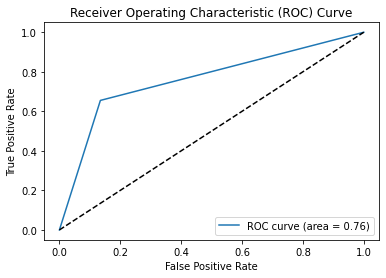

In [112]:
fpr, tpr, thresholds = roc_curve(y, yy)

# Computing the AUC score
roc_auc = auc(fpr, tpr)

#Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

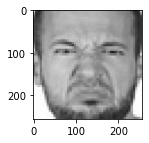

In [107]:
from tensorflow.keras.preprocessing import image

test_image = image.load_img('data/test/disgust/PrivateTest_22382996.jpg', target_size = (256,256))
plt.figure(figsize=(2, 2))
plt.imshow(test_image);

In [108]:
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = mod_5d.predict(test_image)
result

array([[0.16213721]], dtype=float32)

In [109]:
rr = result.reshape(1)
neut_conf = round(rr[0] * 100, 2)
disg_conf = round(100-(rr[0] * 100), 2)

print(f'Emotion prediction\n\nDisgust: {disg_conf}%\nNeutral: {neut_conf}%')

Emotion prediction

Disgust: 83.79%
Neutral: 16.21%


In [110]:
if result > 0.5: 
    print(f'Predicted class is Neutral')
else:
    print(f'Predicted class is Disgust')

Predicted class is Disgust


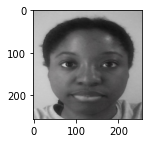

In [103]:
test_image2 = image.load_img('/Users/moyojimi/Desktop/Dissertation/Code/imgtest/neut.jpg', target_size = (256,256))
plt.figure(figsize=(2, 2))
plt.imshow(test_image2);

In [104]:
test_image2 = image.img_to_array(test_image2)
test_image2 = test_image2/255
test_image2 = np.expand_dims(test_image2, axis = 0)
result2 = mod_5d.predict(test_image2)
result2

array([[0.85819304]], dtype=float32)

In [105]:
rr2 = result2.reshape(1)
neut_conf = round(rr2[0] * 100, 2)
disg_conf = round(100-(rr2[0] * 100), 2)

print(f'Emotion prediction\n\nDisgust: {disg_conf}%\nNeutral: {neut_conf}%')

Emotion prediction

Disgust: 14.18%
Neutral: 85.82%


In [106]:
if result2 > 0.5: 
    print(f'Predicted class is Neutral')
else:
    print(f'Predicted class is Disgust')

Predicted class is Neutral


## Conclusion

The models for the disgust-neutral were trained on a perfectly balanced dataset as both image folders contained the same number of images. It should also be noted that the dataset used to train the models for this classifier were the smallest out of all six image classifiers. Despite this, the model still performs well with a good accuracy score of 77% and the predictions on the test images were accurate.